## GRADUATE ADMISSIONS

The dataset contains several parameters which are considered important during the application for Masters Programs. The parameters included are :

* GRE Scores ( out of 340 )
* TOEFL Scores ( out of 120 )
* University Rating ( out of 5 )
* Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
* Undergraduate GPA ( out of 10 )
* Research Experience ( either 0 or 1 )
* Chance of Admit ( ranging from 0 to 1 )

In [1]:
!ls -lha ../input/

total 40K
drwxr-xr-x 2 nobody nogroup 4.0K Jan  9  2020 .
drwxr-xr-x 5 root   root    4.0K Oct  7 19:24 ..
-rw-r--r-- 1 nobody nogroup  13K Jan  9  2020 Admission_Predict.csv
-rw-r--r-- 1 nobody nogroup  16K Jan  9  2020 Admission_Predict_Ver1.1.csv


### Load the dataset and do some exploratory analysis

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('../input/Admission_Predict_Ver1.1.csv')
df.head() 

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


In [4]:
#to get the total number of rolls and columns in the dataset
df.shape

(500, 9)

In [5]:
#lets get a feel of the dataset
df.sample(20)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
413,414,317,101,3,3.0,2.0,7.94,1,0.49
103,104,317,104,2,4.5,4.0,8.47,0,0.57
301,302,319,108,2,2.5,3.0,8.76,0,0.66
353,354,300,102,3,3.5,2.5,8.17,0,0.63
39,40,307,108,2,4.0,3.5,7.70,0,0.48
467,468,318,101,5,3.5,5.0,8.78,1,0.78
365,366,330,114,4,4.5,3.0,9.17,1,0.86
391,392,318,106,3,2.0,3.0,8.65,0,0.71
486,487,319,102,3,2.5,2.5,8.37,0,0.68
55,56,320,103,3,3.0,3.0,7.70,0,0.64


In [6]:
#drop irrelevant columns 
df = df.drop(['Serial No.'], axis=1)

In [7]:
#check for missing values
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [8]:
#what are the featues in the dataset
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [9]:
#insight to the data type and numerical values of the features of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(4)
memory usage: 31.3 KB


In [10]:
#show each feature and the number of unique elements each contains
df.nunique()

GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 184
Research               2
Chance of Admit       61
dtype: int64

In [11]:
#check the overall analytical attributes of the dataset
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [12]:
import numpy as np
#finding the average value of each features 
# sop - statement of purpose
# lor - letter of recommendation
gre = df['GRE Score'].mean()
toefl = df['TOEFL Score'].mean()
cgpa = df['CGPA'].mean()
sop = np.round(df['SOP'].mean())
lor = np.round(df['LOR '].mean())
research = np.round(df['Research'].mean())
uni_rating = np.round(df['University Rating'].mean())

# printing the results
print("The Average Score for GRE is {:.2f}".format(gre))
print("The Average Score for TOEFL is {:.2f}".format(toefl))
print("The Average CGPA is {:.2f}".format(cgpa))
print("The Average Number for Statement of Purpose is", sop)
print("The Average Number for Recommendation letters among the students is", lor)
print("The Average Number of Research done by students is ", research)
print("The Average University Ratings of Different Students is ", uni_rating)


The Average Score for GRE is 316.47
The Average Score for TOEFL is 107.19
The Average CGPA is 8.58
The Average Number for Statement of Purpose is 3.0
The Average Number for Recommendation letters among the students is 3.0
The Average Number of Research done by students is  1.0
The Average University Ratings of Different Students is  3.0


In [13]:
#finding the minimum value of each features 

gre = df['GRE Score'].min()
toefl = df['TOEFL Score'].min()
cgpa = df['CGPA'].min()
sop = np.round(df['SOP'].min())
lor = np.round(df['LOR '].min())
research = np.round(df['Research'].min())
uni_rating = np.round(df['University Rating'].min())

# printing the results
print("The Minimum Score for GRE is {:.2f}".format(gre))
print("The Minimum Score for TOEFL is {:.2f}".format(toefl))
print("The Minimum CGPA is {:.2f}".format(cgpa))
print("The Minimum Number for Statement of Purpose is", sop)
print("The Minimum Number for Recommendation letters among the students is", lor)
print("The Minimum Number of Research done by students is ", research)
print("The Minimum University Ratings of Different Students is ", uni_rating)

The Minimum Score for GRE is 290.00
The Minimum Score for TOEFL is 92.00
The Minimum CGPA is 6.80
The Minimum Number for Statement of Purpose is 1.0
The Minimum Number for Recommendation letters among the students is 1.0
The Minimum Number of Research done by students is  0
The Minimum University Ratings of Different Students is  1


In [14]:
#finding the maximum value of each features 

gre = df['GRE Score'].max()
toefl = df['TOEFL Score'].max()
cgpa = df['CGPA'].max()
sop = np.round(df['SOP'].max())
lor = np.round(df['LOR '].max())
research = np.round(df['Research'].max())
uni_rating = np.round(df['University Rating'].max())

# printing the results
print("The Maximum Score for GRE is {:.2f}".format(gre))
print("The Maximum Score for TOEFL is {:.2f}".format(toefl))
print("The Maximum CGPA is {:.2f}".format(cgpa))
print("The Maximum Number for Statement of Purpose is", sop)
print("The Maximum Number for Recommendation letters among the students is", lor)
print("The Maximum Number of Research done by students is ", research)
print("The Maximum University Ratings of Different Students is ", uni_rating)

The Maximum Score for GRE is 340.00
The Maximum Score for TOEFL is 120.00
The Maximum CGPA is 9.92
The Maximum Number for Statement of Purpose is 5.0
The Maximum Number for Recommendation letters among the students is 5.0
The Maximum Number of Research done by students is  1
The Maximum University Ratings of Different Students is  5


### Data Visualizations

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('figure', figsize=(10,7))
plt.style.use('_classic_test')

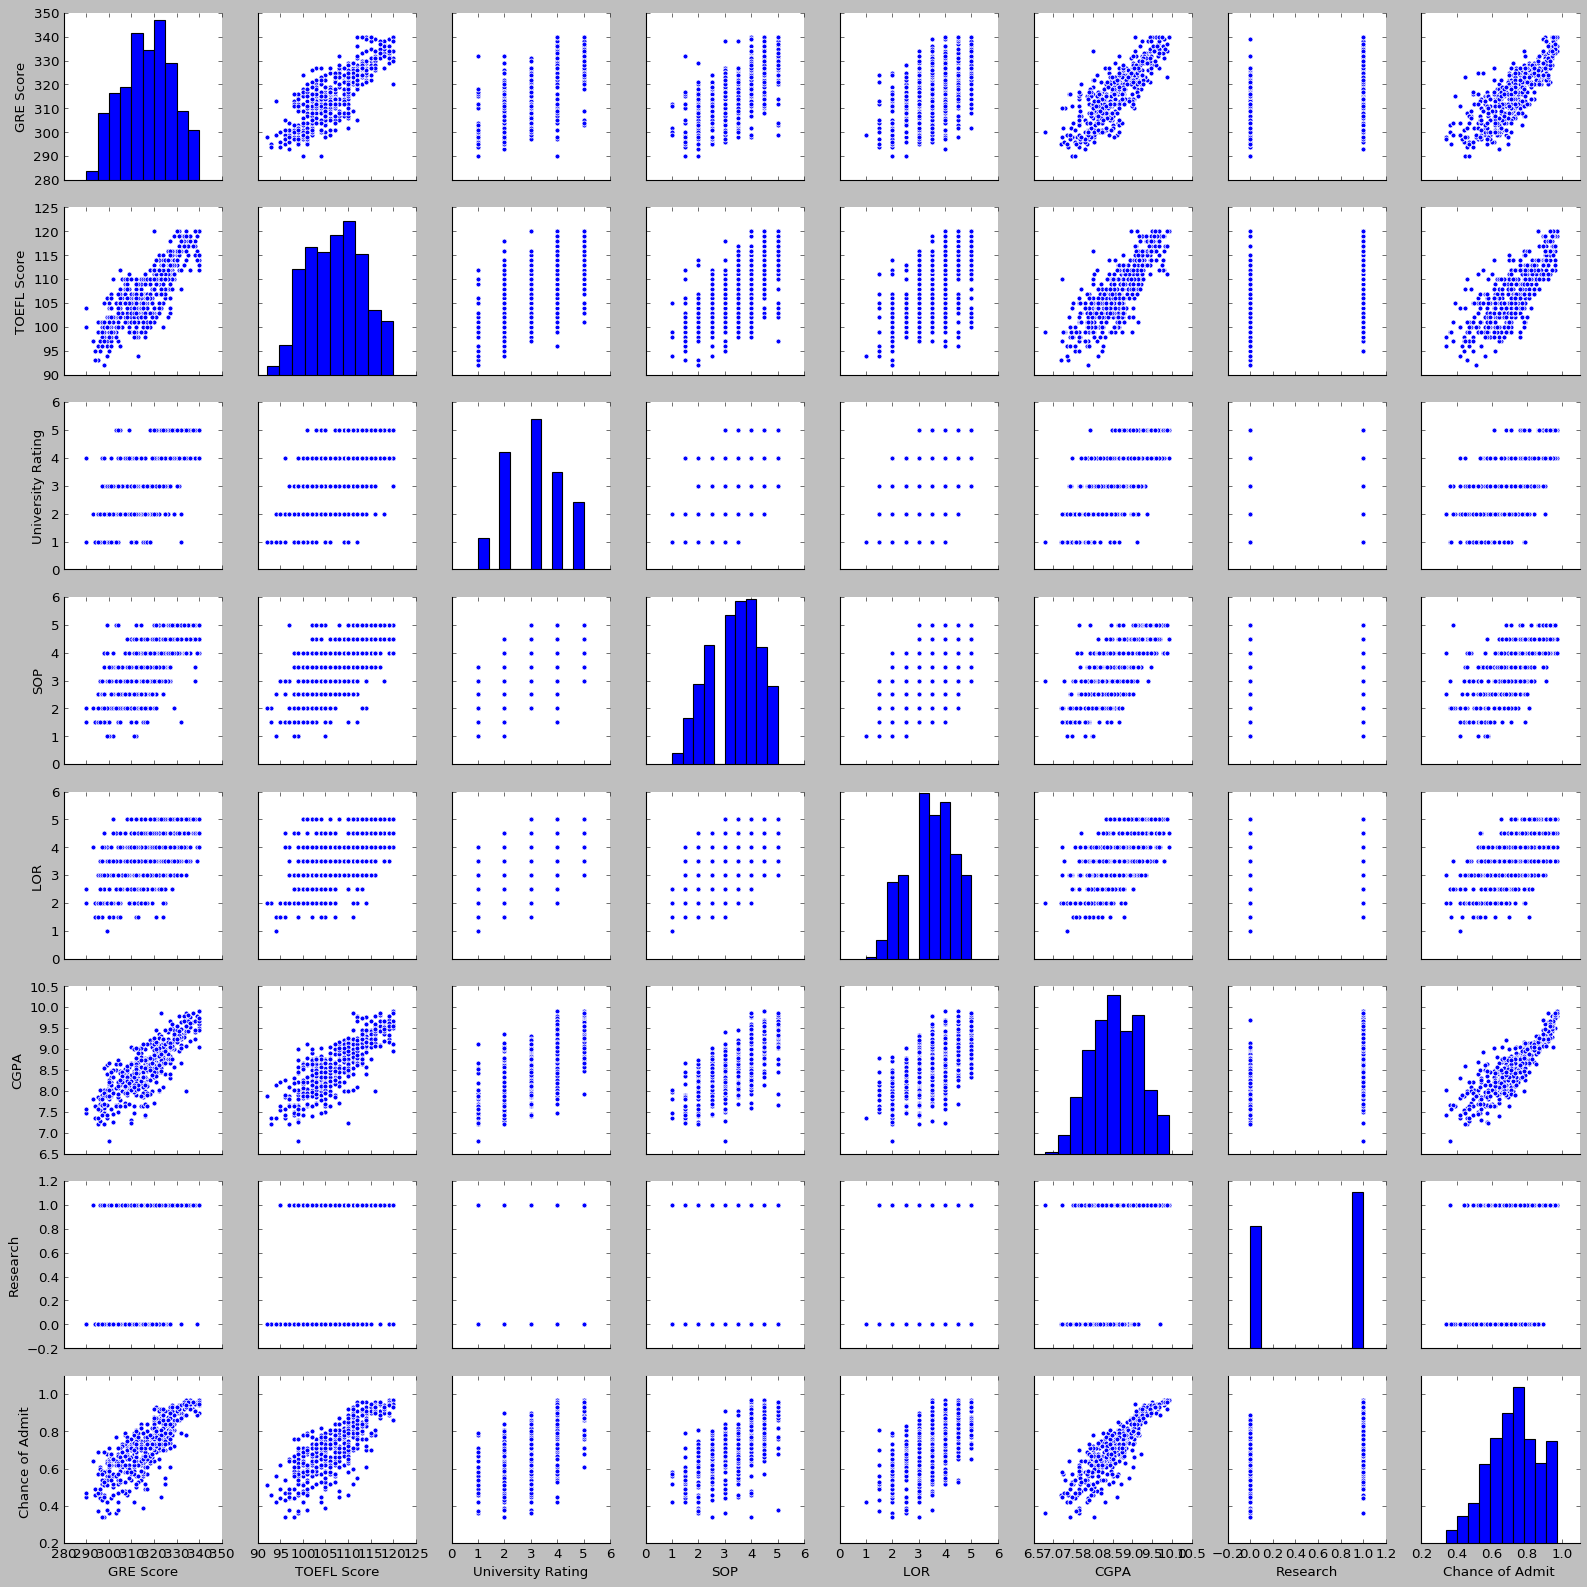

In [16]:
#this plots a scatterplot between each numerical feature in the dataset giving an overall summary.
sns.pairplot(df)
plt.show()

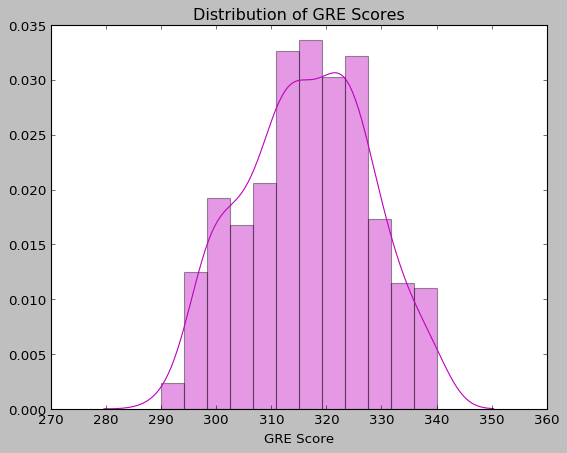

In [17]:
#lets see the distribution of the variables of graduate applicants.

fig = sns.distplot(df['GRE Score'], color='m')
plt.title("Distribution of GRE Scores")
plt.show()

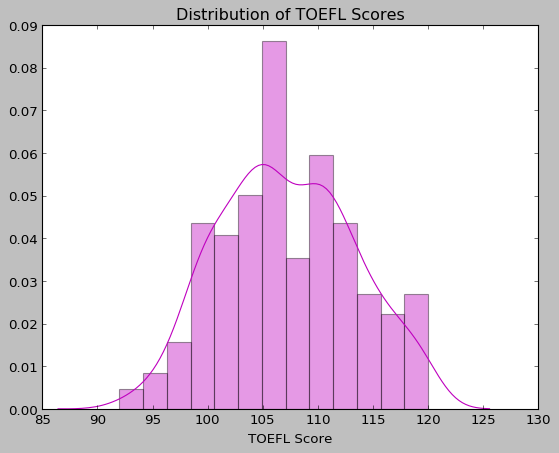

In [18]:
fig = sns.distplot(df['TOEFL Score'], color='m')
plt.title("Distribution of TOEFL Scores")
plt.show()

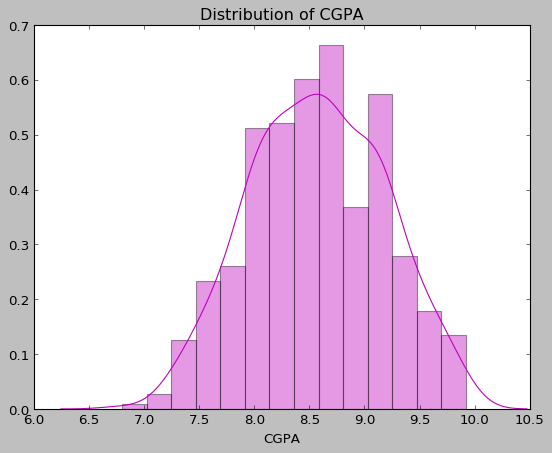

In [19]:
fig = sns.distplot(df['CGPA'], color='m')
plt.title("Distribution of CGPA")
plt.show()

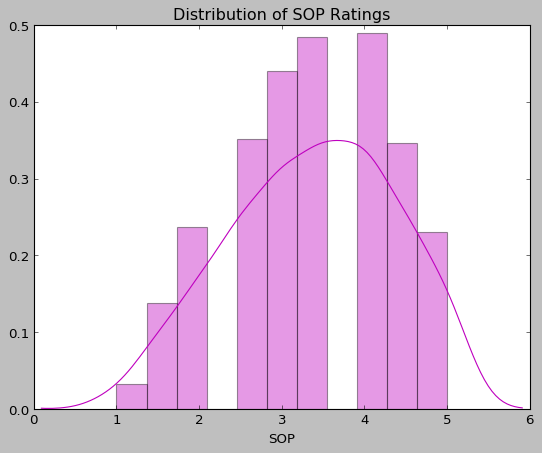

In [20]:
fig = sns.distplot(df['SOP'], color='m')
plt.title("Distribution of SOP Ratings")
plt.show()

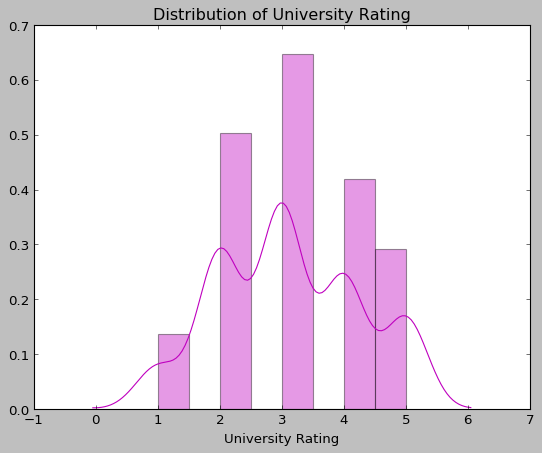

In [21]:
fig = sns.distplot(df['University Rating'], color= 'm')
plt.title("Distribution of University Rating")
plt.show()


It is clear from the distributions, students with varied merit apply for the university.



**Understanding the relation between different factors responsible for graduate admissions**

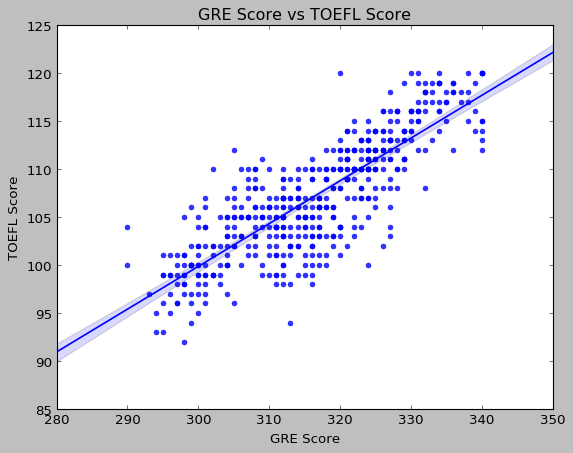

In [22]:
fig = sns.regplot(x="GRE Score", y="TOEFL Score", data=df)
plt.title("GRE Score vs TOEFL Score")
plt.show()

People with higher GRE Scores also have higher TOEFL Scores which is justified because both TOEFL and GRE have a verbal section which although not similar are relatable

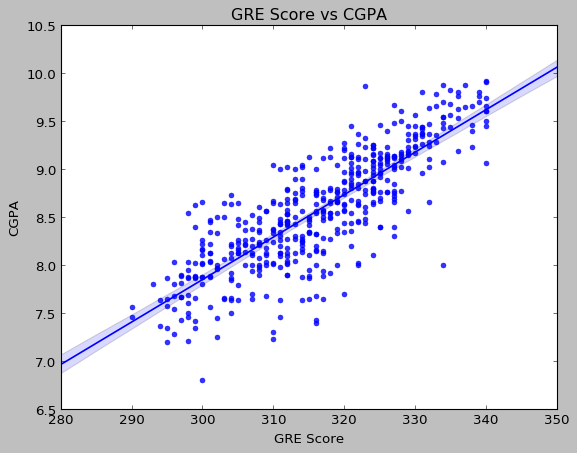

In [23]:
fig = sns.regplot(x="GRE Score", y="CGPA", data=df)
plt.title("GRE Score vs CGPA")
plt.show()

Although there are exceptions, people with higher CGPA usually have higher GRE scores maybe because they are smart or hard working

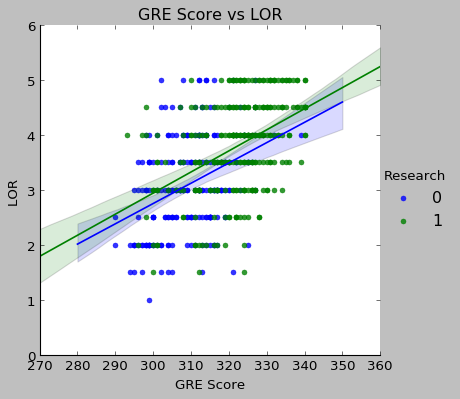

In [24]:
fig = sns.lmplot(x="GRE Score", y="LOR ", data=df, hue="Research")
plt.title("GRE Score vs LOR")
plt.show()

 GRE scores and LORs are also not related. People with different kinds of LORs have all kinds of GRE scores

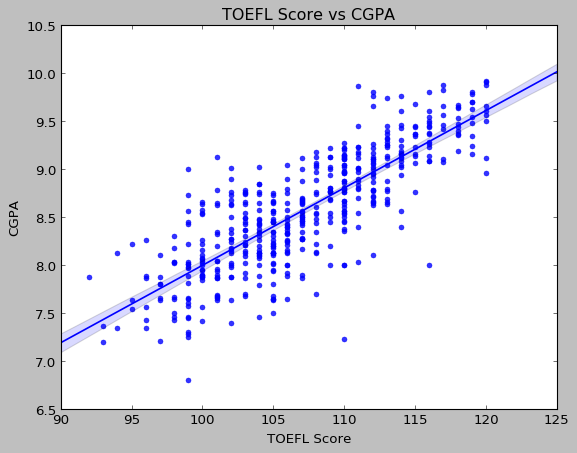

In [25]:
fig = sns.regplot(x="TOEFL Score", y="CGPA", data=df)
plt.title("TOEFL Score vs CGPA")
plt.show()

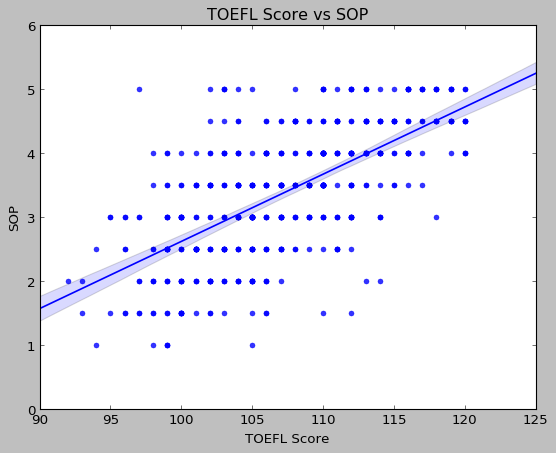

In [26]:
fig = sns.regplot(x="TOEFL Score", y="SOP", data=df)
plt.title("TOEFL Score vs SOP")
plt.show()

Applicants with different kinds of SOP have different kinds of TOEFL Score. So the quality of SOP is not always related to the applicants English skills.

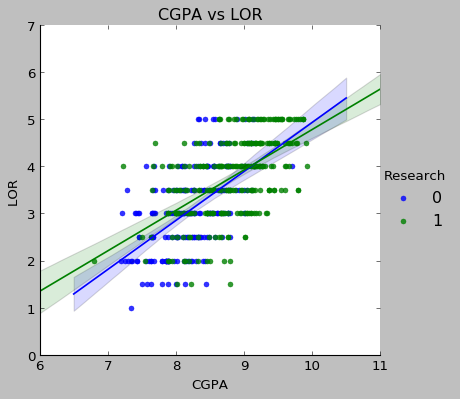

In [27]:
fig = sns.lmplot(x="CGPA", y="LOR ", data=df, hue="Research")
plt.title("CGPA vs LOR")
plt.show()

LORs are not that related with CGPA so it is clear that a persons LOR is not dependent on that persons academic excellence. Having research experience is usually related with a good LOR which might be justified by the fact that supervisors have personal interaction with the students performing research which usually results in good LORs

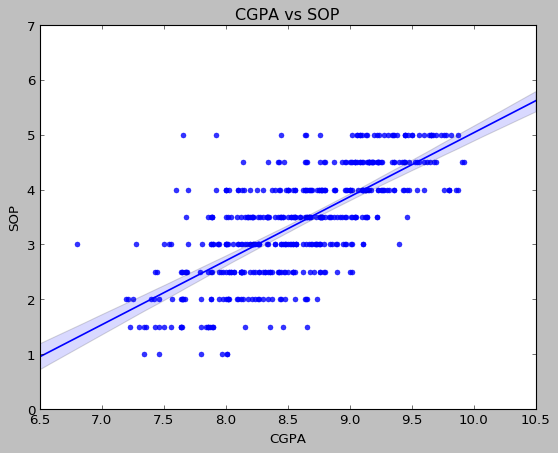

In [28]:
fig = sns.regplot(x="CGPA", y="SOP", data=df)
plt.title("CGPA vs SOP")
plt.show()

CGPA and SOP are slightly related because Statement of Purpose is related to academic performance. People with good CGPA tend to be more hard working so they have good things to say in their SOP which might explain the slight  move towards higher CGPA as along with good SOPs

**Correlation among variables**

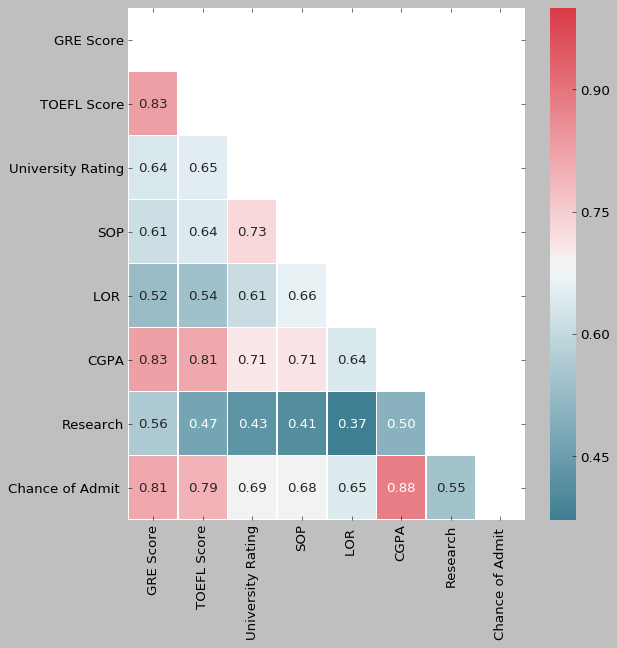

In [29]:
import numpy as np
corr = df.corr()
fig, ax = plt.subplots(figsize=(8, 8))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt=".2f", mask= mask)
plt.show()

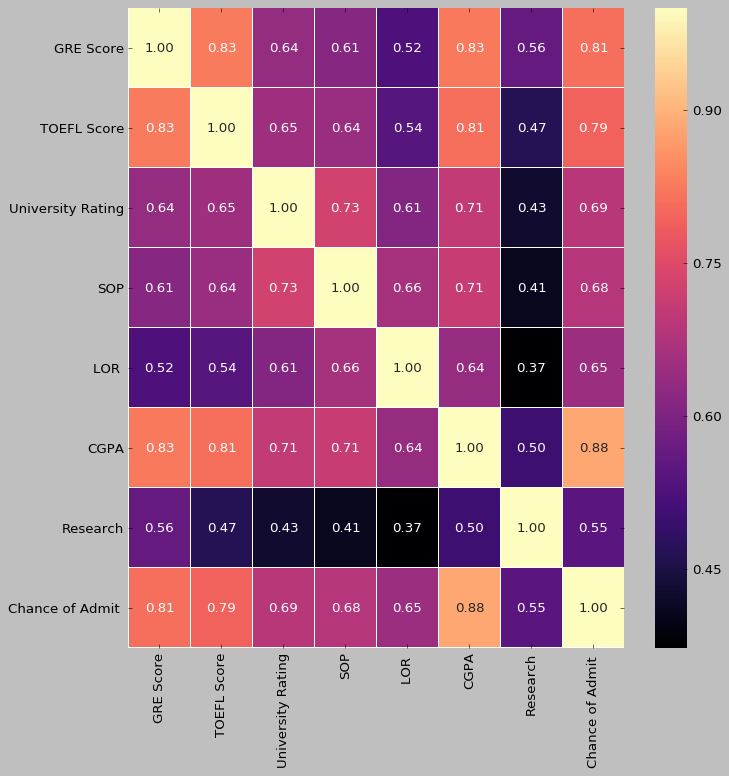

In [30]:
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

## Summary of the Correlation analysis
* There is a Strong Positive Corelation of 81 % of GRE score with Chance of Admission. This means Chance of admission is increasing with increase in GRE Score.   
* There is a Strong Positive Corelation of 79 % of TOEFL score with Chance of Admission. This means Chance of admission is increasing with increase in TOEFL Score. 
* There is a Strong Positive Corelation of 69 % of University Rating with Chance of Admission. This means Chance of admission is increasing with increase in University rating.
* There is a Strong Positive Corelation of 88 % of CGPA with Chance of Admission. This means Chance of admission is increasing with increase in CGPA.
* There is a Strong Positive Corelation of 68 % of SOP with Chance of Admission. This means Chance of admission is increasing with increase in SOP. 
* There is a Strong Positive Corelation of 65 % of LOR with Chance of Admission. This means Chance of admission is increasing with increase in LOR. 
